In [9]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import wilson_action
from modules import utility

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
plaquette_data_notwist = read_and_write.load_from_folder("./current_output/notwist","plaquette:", "real")

In [4]:
plaquette_data_twist = read_and_write.load_from_folder("./current_output/twist","plaquette:", "real")

[[{'5.085 0': 0.5850877289302361, '5.087777777777778 0': 0.5836242791567502, '5.0905555555555555 0': 0.5799849222518367, '5.093333333333334 0': 0.5648802883358351, '5.096111111111111 0': 0.5558329003860238, '5.098888888888889 0': 0.5502998947818609, '5.101666666666667 0': 0.5485108135180402, '5.104444444444445 0': 0.5474198656945873, '5.107222222222222 0': 0.5457541587695056, '5.11 0': 0.5445164261954853}, 'notwist'], [{'5.085 1': 0.5850686411666551, '5.087777777777778 1': 0.5846079963953149, '5.0905555555555555 1': 0.5839559649545482, '5.093333333333334 1': 0.5832620183155811, '5.096111111111111 1': 0.5824645449163918, '5.098888888888889 1': 0.5805963351392188, '5.101666666666667 1': 0.5777899809811071, '5.104444444444445 1': 0.5708521547878724, '5.107222222222222 1': 0.5632410471586632, '5.11 1': 0.5600209879815479}, 'twist']]
[5.085, 5.087777777777778, 5.0905555555555555, 5.093333333333334, 5.096111111111111, 5.098888888888889, 5.101666666666667, 5.104444444444445, 5.107222222222222

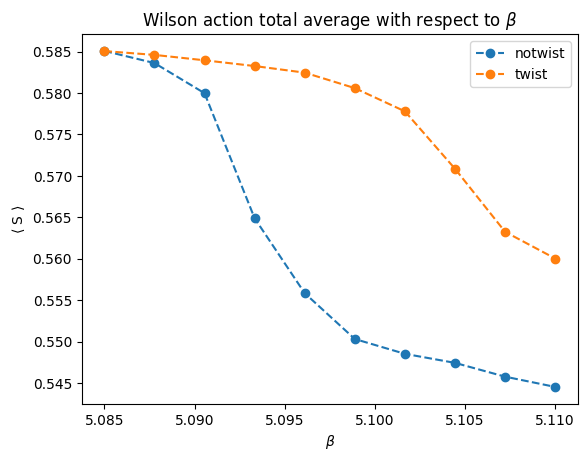

In [5]:
wilson_action.create_average_action_figure(plaquette_data_notwist,"notwist",plaquette_data_twist,"twist")

**Wilson action average with $\beta = 5.08-5.12 $**

Data: "./current_output/{notwist/twist}"

Used command: `wilson_action.create_average_action_figure(subset_data_notwist,"notwist",subset_data_twist,"twist")`

!["./plots/wilson_action_average_question1.png"](./plots/wilson_action_average_question1.png)

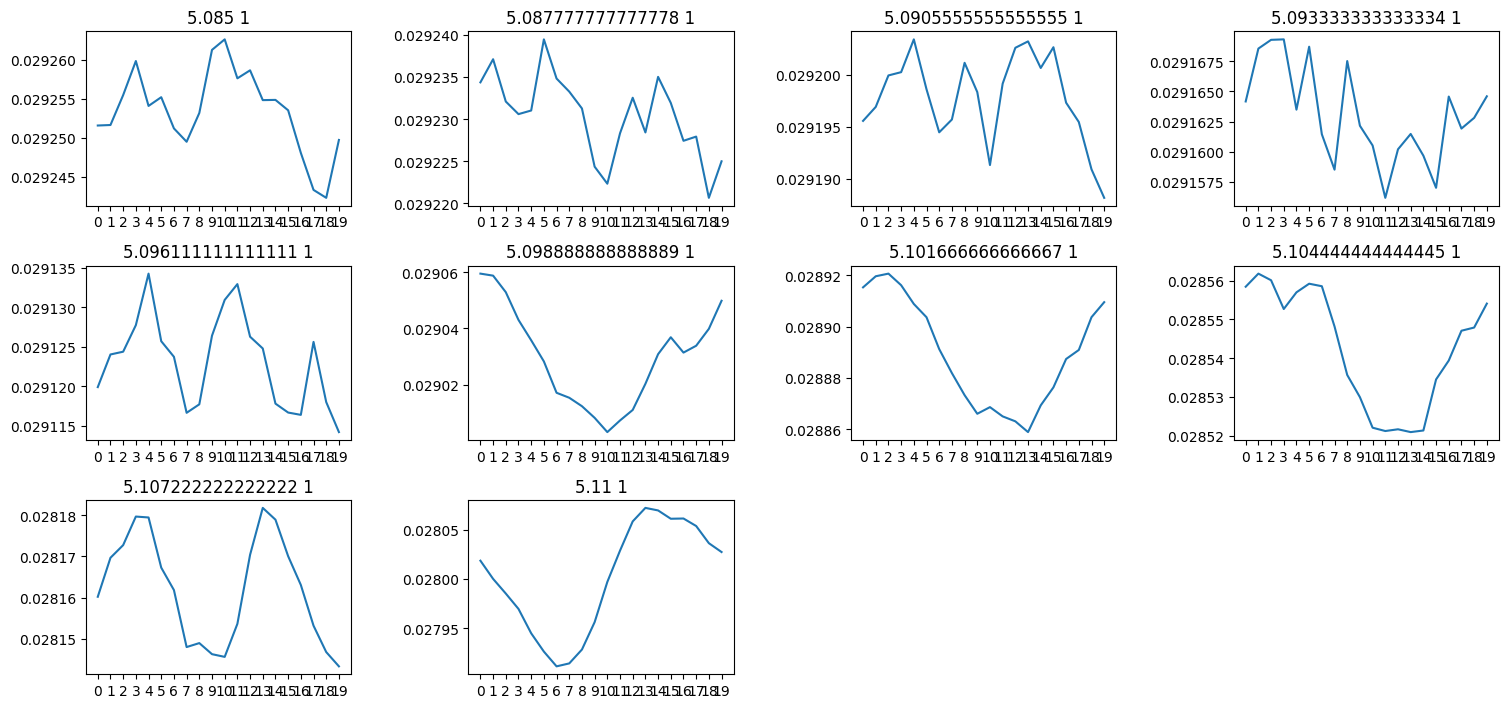

In [6]:
wilson_action.create_z_index_heat_map(plaquette_data_twist,mean=True)

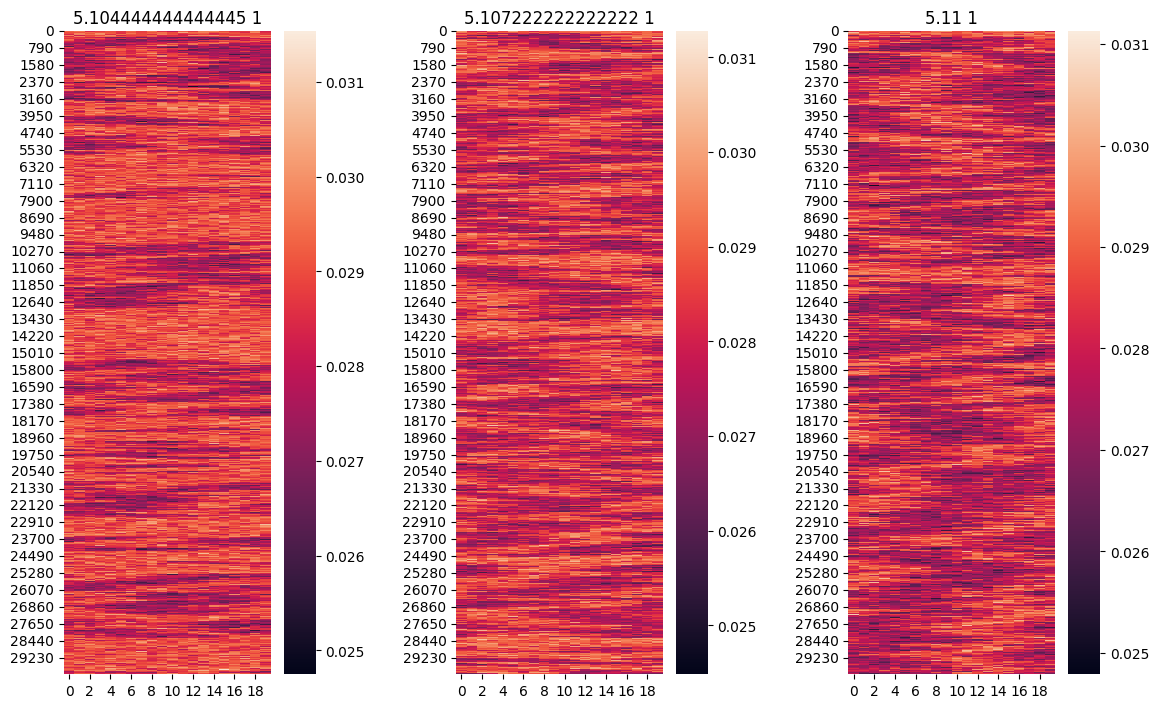

In [20]:
wilson_action.create_z_index_heat_map(utility.select_subset(plaquette_data_twist,7,10))